In [1]:
from __future__ import print_function, division, unicode_literals

import pandas as pd
import numpy as np
import os

from sklearn.datasets import load_wine
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_val_predict

%matplotlib inline
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "wine"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [2]:
#print(wine.DESCR)

In [3]:
wine = load_wine()

In [4]:
wine.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [5]:
wine['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [6]:
wine_df = pd.DataFrame(np.c_[wine['data'], wine['target']],
                  columns=np.append(wine['feature_names'], ['target']))  

In [7]:
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0


In [8]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
alcohol                         178 non-null float64
malic_acid                      178 non-null float64
ash                             178 non-null float64
alcalinity_of_ash               178 non-null float64
magnesium                       178 non-null float64
total_phenols                   178 non-null float64
flavanoids                      178 non-null float64
nonflavanoid_phenols            178 non-null float64
proanthocyanins                 178 non-null float64
color_intensity                 178 non-null float64
hue                             178 non-null float64
od280/od315_of_diluted_wines    178 non-null float64
proline                         178 non-null float64
target                          178 non-null float64
dtypes: float64(14)
memory usage: 19.6 KB


In [9]:
wine_df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027B2A0DC208>,
      dtype=object)

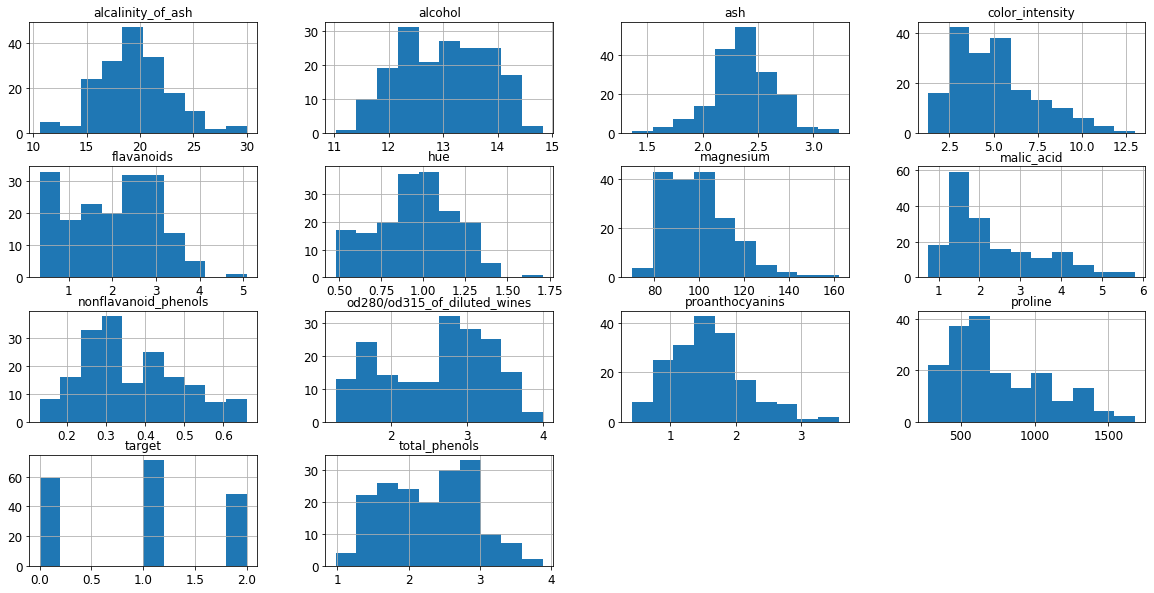

In [10]:
wine_df.hist(figsize=(20,10))

In [11]:
correlation = wine_df.corr()
correlation['target'].sort_values(ascending=False)

target                          1.000000
alcalinity_of_ash               0.517859
nonflavanoid_phenols            0.489109
malic_acid                      0.437776
color_intensity                 0.265668
ash                            -0.049643
magnesium                      -0.209179
alcohol                        -0.328222
proanthocyanins                -0.499130
hue                            -0.617369
proline                        -0.633717
total_phenols                  -0.719163
od280/od315_of_diluted_wines   -0.788230
flavanoids                     -0.847498
Name: target, dtype: float64

###### Class distribution

In [12]:
target0 = int(wine_df[wine_df['target'] == 0]['target'].count())
target1 = int(wine_df[wine_df['target'] == 1]['target'].count())
target2 = int(wine_df[wine_df['target'] == 2]['target'].count())

target0, target1, target2

(59, 71, 48)

##### Spliting dataset

In [13]:
X = wine_df.drop('target', axis=1)
y = wine_df['target']

print(">> Feature values << \n", X)
print(">> Target << \n", y)

>> Feature values << 
      alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0      14.23        1.71  2.43               15.6      127.0           2.80   
1      13.20        1.78  2.14               11.2      100.0           2.65   
2      13.16        2.36  2.67               18.6      101.0           2.80   
3      14.37        1.95  2.50               16.8      113.0           3.85   
4      13.24        2.59  2.87               21.0      118.0           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5       95.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37               20.0      120.0           1.65   
177    14.13        4.10  2.74               24.5       96.0           2.05   

     flavanoids  nonflavanoi

In [14]:
scaler = MinMaxScaler()
X['magnesium'] = scaler.fit_transform(X[['magnesium']])
X['proline'] = scaler.fit_transform(X[['proline']])

X['magnesium'], X['proline']

(0      0.619565
 1      0.326087
 2      0.336957
 3      0.467391
 4      0.521739
          ...   
 173    0.271739
 174    0.347826
 175    0.543478
 176    0.543478
 177    0.282609
 Name: magnesium, Length: 178, dtype: float64, 0      0.561341
 1      0.550642
 2      0.646933
 3      0.857347
 4      0.325963
          ...   
 173    0.329529
 174    0.336662
 175    0.397290
 176    0.400856
 177    0.201141
 Name: proline, Length: 178, dtype: float64)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=124, random_state=1)

##### K Neighbor Classifier

In [16]:
knc = KNeighborsClassifier(n_neighbors=1)
knc.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [17]:
means = wine_df.mean()[:-1].values.reshape(1, -1)
knc.predict(means)

array([0.])

In [18]:
knc.predict(X_test)

array([2., 1., 0., 1., 0., 2., 1., 0., 2., 1., 0., 0., 1., 0., 1., 1., 2.,
       0., 1., 0., 0., 1., 1., 1., 0., 2., 0., 0., 0., 2., 0., 2., 2., 0.,
       1., 1., 1., 1., 1., 0., 0., 0., 2., 0., 0., 0., 0., 0., 0., 0., 1.,
       2., 2., 0.])

In [19]:
knc_predictor = knc.predict(X_test)
print(classification_report(y_test, knc_predictor))

              precision    recall  f1-score   support

         0.0       0.88      1.00      0.94        23
         1.0       0.94      0.84      0.89        19
         2.0       1.00      0.92      0.96        12

    accuracy                           0.93        54
   macro avg       0.94      0.92      0.93        54
weighted avg       0.93      0.93      0.93        54



In [20]:
mean_acc = np.mean(y_test == knc.predict(X_test))
mean_acc

0.9259259259259259

In [21]:
y_train_predict = cross_val_predict(knc, X_train, y_train, cv=3)
confusion_matrix(y_train, y_train_predict)

array([[34,  2,  0],
       [ 5, 46,  1],
       [ 0,  2, 34]], dtype=int64)

##### Support Vector Machine

In [22]:
svm = SVC(gamma='auto')
svm.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [23]:
means = wine_df.mean()[:-1].values.reshape(1, -1)
svm.predict(means)

array([1.])

In [24]:
svm.predict(X_test)

array([2., 1., 0., 1., 0., 2., 1., 0., 2., 1., 0., 0., 1., 0., 1., 1., 2.,
       0., 1., 0., 0., 1., 1., 1., 0., 2., 0., 0., 0., 2., 1., 2., 2., 0.,
       1., 1., 1., 1., 1., 0., 0., 1., 2., 0., 0., 0., 1., 0., 0., 0., 1.,
       2., 2., 0.])

In [25]:
svm_predictor = svm.predict(X_test)
print(classification_report(y_test, svm_predictor))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        23
         1.0       0.95      1.00      0.97        19
         2.0       1.00      0.92      0.96        12

    accuracy                           0.98        54
   macro avg       0.98      0.97      0.98        54
weighted avg       0.98      0.98      0.98        54



In [26]:
y_train_predict = cross_val_predict(svm, X_train, y_train, cv=3)
confusion_matrix(y_train, y_train_predict)

array([[31,  5,  0],
       [ 1, 50,  1],
       [ 0,  1, 35]], dtype=int64)

##### Random Forest Classifier

In [27]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

C:\Users\thinh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [28]:
means = wine_df.mean()[:-1].values.reshape(1, -1)
rfc.predict(means)

array([0.])

In [29]:
rfc_predictor = rfc.predict(X_test)
print(classification_report(y_test, rfc_predictor))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        23
         1.0       1.00      1.00      1.00        19
         2.0       1.00      1.00      1.00        12

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



In [30]:
y_train_predict = cross_val_predict(rfc, X_train, y_train, cv=3)
confusion_matrix(y_train, y_train_predict)

array([[36,  0,  0],
       [ 2, 48,  2],
       [ 1,  0, 35]], dtype=int64)

##### Stochastic Gradient Descent Classifier

In [31]:
sgd_cl = SGDClassifier()
sgd_cl.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [32]:
means = wine_df.mean()[:-1].values.reshape(1, -1)
sgd_cl.predict(means)

array([0.])

In [33]:
sgd_predictor = sgd_cl.predict(X_test)
print(classification_report(y_test, sgd_predictor))

              precision    recall  f1-score   support

         0.0       0.68      1.00      0.81        23
         1.0       1.00      0.47      0.64        19
         2.0       1.00      0.92      0.96        12

    accuracy                           0.80        54
   macro avg       0.89      0.80      0.80        54
weighted avg       0.86      0.80      0.78        54



In [34]:
y_train_predict = cross_val_predict(sgd_cl, X_train, y_train, cv=3)
confusion_matrix(y_train, y_train_predict)

array([[34,  2,  0],
       [17, 26,  9],
       [ 2,  0, 34]], dtype=int64)

##### Fine tune model RFC

In [35]:
param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

rfc_grid = RandomForestClassifier()
grid_search = GridSearchCV(rfc_grid, param_grid, cv=5,
                          scoring='neg_mean_squared_error',
                          return_train_score=True)
grid_search.fit(X_test, y_test)

C:\Users\thinh\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [36]:
grid_search.best_params_

{'bootstrap': False, 'max_features': 4, 'n_estimators': 10}

In [37]:
grid_search.best_estimator_

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
                       max_depth=None, max_features=4, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [38]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.408248290463863 {'max_features': 2, 'n_estimators': 3}
0.19245008972987526 {'max_features': 2, 'n_estimators': 10}
0.19245008972987526 {'max_features': 2, 'n_estimators': 30}
0.2721655269759087 {'max_features': 4, 'n_estimators': 3}
0.13608276348795434 {'max_features': 4, 'n_estimators': 10}
0.19245008972987526 {'max_features': 4, 'n_estimators': 30}
0.3600411499115478 {'max_features': 6, 'n_estimators': 3}
0.19245008972987526 {'max_features': 6, 'n_estimators': 10}
0.19245008972987526 {'max_features': 6, 'n_estimators': 30}
0.3333333333333333 {'max_features': 8, 'n_estimators': 3}
0.13608276348795434 {'max_features': 8, 'n_estimators': 10}
0.19245008972987526 {'max_features': 8, 'n_estimators': 30}
0.408248290463863 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
0.19245008972987526 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
0.23570226039551584 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
0.19245008972987526 {'bootstrap': False, 'max_feature

In [39]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([0.06247525, 0.01819314, 0.00505951, 0.01079662, 0.02542189,
       0.03568953, 0.06594615, 0.        , 0.        , 0.30646339,
       0.07826348, 0.08151907, 0.31017197])

##### Evaluate for final test

In [40]:
final_model = grid_search.best_estimator_
final_predictions = final_model.predict(X_test)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

0.0